# Task 4


In [31]:
using DataFrames, GLM, StatsBase
using Plots
using StatsPlots
include("MBP.jl")
include("alphastable.jl")

alphastable (generic function with 1 method)

In [32]:
Alpha = [1.5, 0.75];
beta = 0;
Gam = [1 2];
delta = 0;
N = 10 ^ 3;
MC = 10 ^ 5;
perc = 0.9;

In [33]:
function get_alpha(alpha, beta, gam, delta, N, perc)
    X = alphastable(N, 1, alpha, beta, gam, delta, 1);
    cde_fun = ecdf(vec(X));
    X_cut = sort(vec(X))[Int(perc * N):end - 1];
    Y = log.(1 .- cde_fun(X_cut));
    X = [log.(X_cut) ones(length(X_cut), 1)];
    est = ((X' * X) ^ (-1) * X' * Y)[1];
    return -est
end

get_alpha (generic function with 1 method)

In [34]:
Est_matrice = ones(MC, length(Alpha)) * -999;

for i in range(1, MC)
    for j in range(1, length(Alpha))
        alpha = Alpha[j];
        gam = Gam[j];
        Est_matrice[i, j] = get_alpha(alpha, beta, gam, delta, N, perc)
    end
end

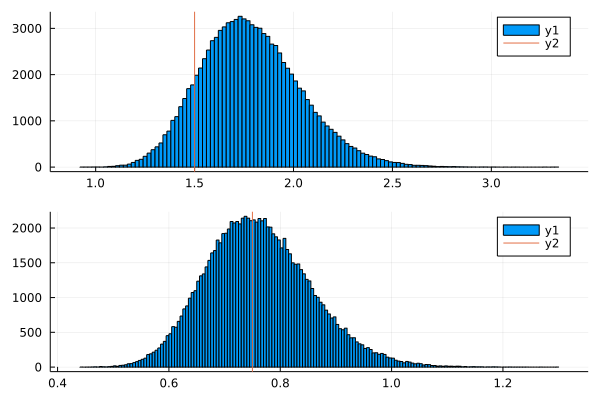

In [35]:
p3 = histogram(Est_matrice[:, 1])
vline!([1.5])
p4 = histogram(Est_matrice[:, 2])
vline!([0.75])
StatsPlots.plot(p3, p4, layout = (2, 1))

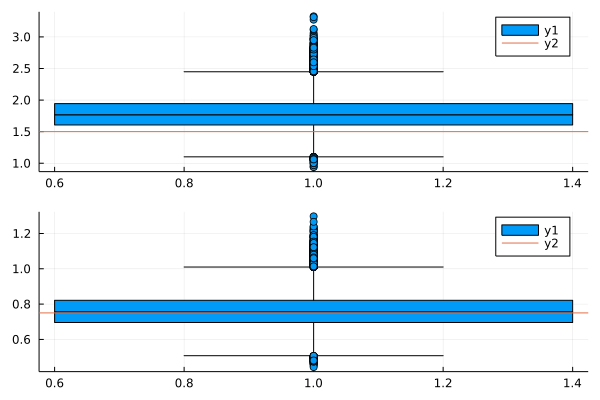

In [36]:
p3 = StatsPlots.boxplot(Est_matrice[:, 1])
hline!([1.5])
p4 = StatsPlots.boxplot(Est_matrice[:, 2])
hline!([0.75])
StatsPlots.plot(p3, p4, layout = (2, 1))